In [ ]:
# Let we done the first important code to learn and understand the exect term of computer .

# Here we use CNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Kaggle ke input folder ka path (Apne dataset ke folder ka naam check kar ke yahan likhen)
train_path = '//kaggle/input/fruits/fruits-360_100x100/fruits-360/Training'
test_path = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test'

# Data load karte waqt memory bachane ke liye image size thora chota rakhen
IMG_SIZE = (100, 100) 
BATCH_SIZE = 64 # GPU ke liye 64 ya 128 behtar hai

# Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical' # Agar multiple fruits hain
)

# Testing Data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Memory Optimization (Kaggle par zaroori hai)
# AUTOTUNE se loading fast ho jati hai aur memory crash nahi hoti
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Dataset successfully loaded on Kaggle!")

2026-02-04 09:28:31.395437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770197311.708386      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770197311.805021      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770197312.589407      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770197312.589470      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770197312.589473      55 computation_placer.cc:177] computation placer alr

Found 130344 files belonging to 250 classes.


2026-02-04 09:30:28.905521: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 43442 files belonging to 250 classes.
Dataset successfully loaded on Kaggle!


In [ ]:
# batch_size = 8
# img_size = (128,128)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Dataset load karein
train_path = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training' # Yahan sahi path likhein

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(100, 100),
    batch_size=32,
    label_mode='categorical'
)

# 2. !!! FORAN class_names ko save karein (Prefetch se pehle) !!!
all_labels = train_ds.class_names
num_classes = len(all_labels)
print(f"Total classes found: {num_classes}")

# 3. Ab performance optimize karein
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 4. Ab model banayein
model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # Ab error nahi ayega
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Found 130344 files belonging to 250 classes.
Total classes found: 250


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,834,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │        32,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,867,770 (37.64 MB)

 Trainable params: 9,867,770 (37.64 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Model ko train karne ka command
history = model.fit(
    train_ds,
    validation_data=test_ds, # Test folder se check karega ke kitna sahi seekha
    epochs=10
)

Epoch 1/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 841s 206ms/step - accuracy: 0.4611 - loss: 2.4090 - val_accuracy: 0.8605 - val_loss: 0.4817
Epoch 2/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 800s 190ms/step - accuracy: 0.9611 - loss: 0.1193 - val_accuracy: 0.9011 - val_loss: 0.4071
Epoch 4/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 821s 195ms/step - accuracy: 0.9696 - loss: 0.0923 - val_accuracy: 0.9206 - val_loss: 0.3698
Epoch 5/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 777s 191ms/step - accuracy: 0.9759 - loss: 0.0754 - val_accuracy: 0.9364 - val_loss: 0.3036
Epoch 6/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 771s 189ms/step - accuracy: 0.9780 - loss: 0.0686 - val_accuracy: 0.9107 - val_loss: 0.4387
Epoch 7/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 795s 195ms/step - accuracy: 0.9850 - loss: 0.0474 - val_accuracy: 0.9456 - val_loss: 0.2927
Epoch 8/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 795s 195ms/step - accuracy: 0.9864 - loss: 0.0464 - val_accuracy: 0.9334 - val_loss: 0.4391
Epoch 9/10
4074/4074 ━━━━━━━━━━━━━━━━━━━━ 795s 195ms/step - ac

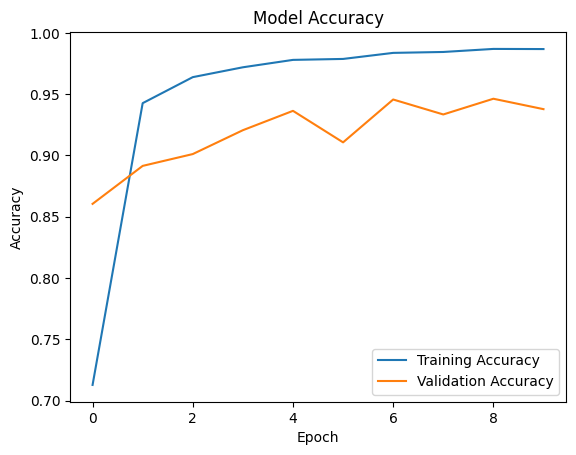

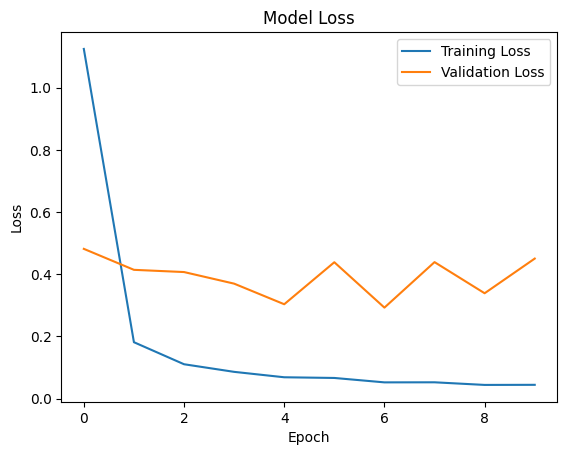

In [4]:
import matplotlib.pyplot as plt

# Accuracy ka graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss ka graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Testing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Actual Fruit: Tomato 4
Model Prediction: Tomato 4


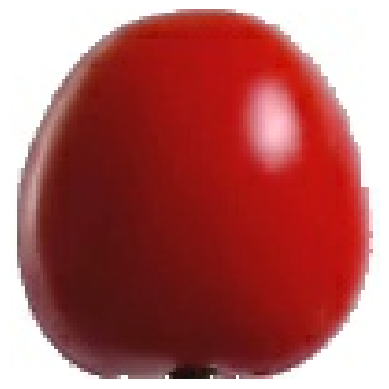

In [5]:
import numpy as np

# Ek image uthayein test dataset se
for images, labels in test_ds.take(1):
    first_image = images[0].numpy().astype("uint8")
    first_label = labels[0]

    plt.imshow(first_image)
    plt.axis("off")

    # Model se kahein ke predict kare
    img_array = tf.expand_dims(first_image, 0) # Model ko 4D batch chahiye hota hai
    predictions = model.predict(img_array)
    
    # Sab se zyada probability wala index nikalein
    score = tf.nn.softmax(predictions[0])
    predicted_class = all_labels[np.argmax(score)]
    actual_class = all_labels[np.argmax(first_label)]

    print(f"Actual Fruit: {actual_class}")
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


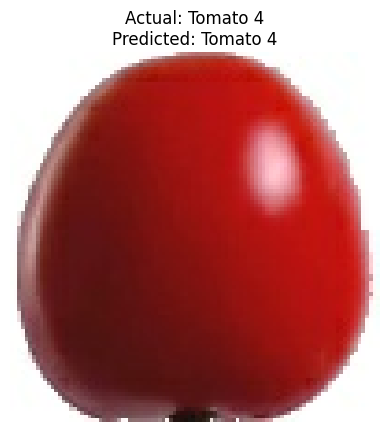

In [6]:
# Test dataset se 1 batch (32 images) uthayein
for images, labels in test_ds.take(1):
    # Batch mein se pehli image (index 0) pakrein
    test_img = images[0].numpy().astype("uint8")
    
    # Predict karein
    img_for_model = tf.expand_dims(test_img, 0)
    prediction = model.predict(img_for_model)
    
    predicted_label = all_labels[np.argmax(prediction)]
    actual_label = all_labels[np.argmax(labels[0])]
    
    # Display
    plt.imshow(test_img)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis("off")

In [ ]:
# NOw testing to model by given many more images as a testing dataset.
# Neechay walay code ma specific image path walay portion ma right side sa apni image ka path dalayan .
# Ya bohat important term ha because is sa ham apnay model ko test kar sktay han ka model sahi seekha ha ya galat.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


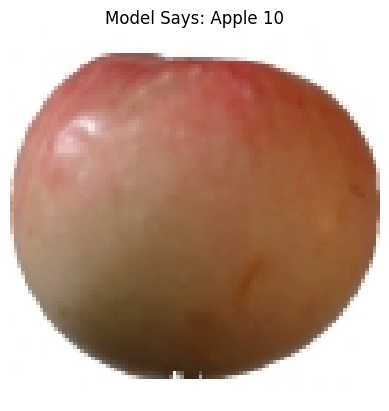

I am 1.08% sure it is Apple 10


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Image ka exact path dein (Test folder ke andar kisi fruit folder se)
# Misal ke tor par: /kaggle/input/fruits/test/Apple/10_100.jpg
specific_img_path = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training/Apple 10/r0_102_100.jpg' 

# 2. Image ko model ke liye tayyar karein
# Target size wahi rakhein jo model training mein tha (100, 100)
img = tf.keras.utils.load_img(specific_img_path, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Model hamesha images ka 'batch' mangta hai

# 3. Model se prediction lein
predictions = model.predict(img_array)

# 4. Result nikaalain
# np.argmax se humein us class ka index milta hai jiski probability sab se zyada ho
score_index = np.argmax(predictions[0])
predicted_fruit = all_labels[score_index]

# 5. Display karein
plt.imshow(img)
plt.title(f"Model Says: {predicted_fruit}")
plt.axis("off")
plt.show()

print(f"I am {100 * np.max(tf.nn.softmax(predictions[0])):.2f}% sure it is {predicted_fruit}")

In [ ]:
# Is neechay walay code sa ham apni image ka uper label laga sktay han.

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

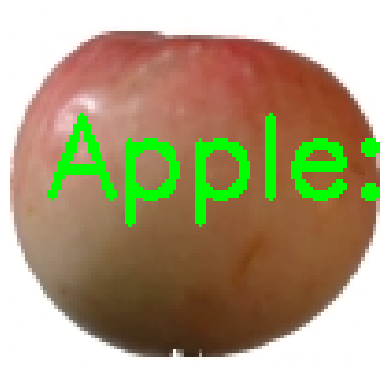

In [8]:
import cv2

# Image load karein
img = cv2.imread(specific_img_path) 

# Model se prediction lein (Upar wala prediction code)
# ... (maan letay hain result 'Apple' aya) ...

# Image par text likhna (Ye OpenCV hai - Traditional CV)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, f'Apple: {predicted_fruit}', (10, 50), font, 1, (0, 255, 0), 2)

# Image dikhana
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')